
___
# Chapter 11: Decision Trees and Random Forests


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Get the Data

In [3]:
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [8]:
predictions = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72        39
           1       0.81      0.73      0.77        52

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [10]:
print(confusion_matrix(y_test,predictions))

[[30  9]
 [14 38]]


## Predicting New Values

In [11]:
dataset.iloc[2,:]

age          41.0
sex           0.0
cp            1.0
trestbps    130.0
chol        204.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       1.4
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 2, dtype: float64

In [12]:
new_data=dataset.iloc[2,:-1].values
classifier.predict([new_data])

array([1], dtype=int64)

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [13]:
weather_data = pd.read_csv('weather.csv')
weather_data.head()

,id,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes


In [14]:
weather_data['play']=weather_data['play'].map({'no':0,'yes':1})
#weather_data['windy']=weather_data['windy'].map({'False':0,'True':1})
weather_data['outlook'] = weather_data['outlook'].map({'sunny':0,'overcast':1,'rainy':2})
weather_data.head()

,id,outlook,temperature,humidity,windy,play
0,1,0,85,85,False,0
1,2,0,80,90,True,0
2,3,1,83,86,False,1
3,4,2,70,96,False,1
4,5,2,68,80,False,1


In [15]:
X = weather_data.iloc[:,1:-1]
y = weather_data.iloc[:,-1]
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(weather_data.columns[1:-1])
features

C:\Users\raj15\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['outlook', 'temperature', 'humidity', 'windy']

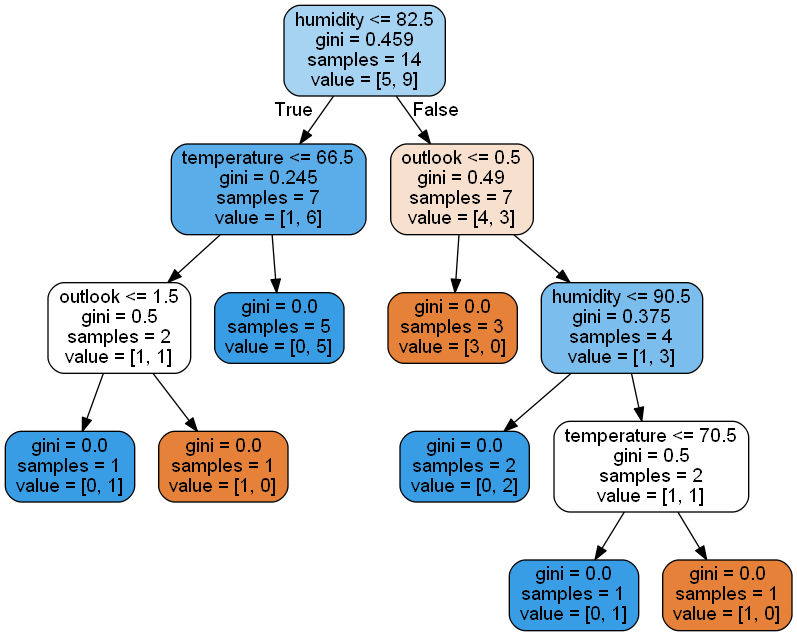

In [17]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = classifier.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[32  7]
 [ 8 44]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.86      0.85      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [22]:
new_data=dataset.iloc[2,:-1].values
classifier.predict([new_data])

array([1], dtype=int64)

## Case study diabeties

In [23]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [40]:
dataset['Diabetic'].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

In [24]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,15000.0,1.502922e+06,289253.443471,1.000038e+06,1.252866e+06,1.505508e+06,1.755205e+06,1.999997e+06
Pregnancies,15000.0,3.224533e+00,3.391020,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
PlasmaGlucose,15000.0,1.078569e+02,31.981975,4.400000e+01,8.400000e+01,1.040000e+02,1.290000e+02,1.920000e+02
DiastolicBloodPressure,15000.0,7.122067e+01,16.758716,2.400000e+01,5.800000e+01,7.200000e+01,8.500000e+01,1.170000e+02
TricepsThickness,15000.0,2.881400e+01,14.555716,7.000000e+00,1.500000e+01,3.100000e+01,4.100000e+01,9.300000e+01
SerumInsulin,15000.0,1.378521e+02,133.068252,1.400000e+01,3.900000e+01,8.300000e+01,1.950000e+02,7.990000e+02
BMI,15000.0,3.150965e+01,9.759000,1.820051e+01,2.125989e+01,3.176794e+01,3.925969e+01,5.603463e+01
DiabetesPedigree,15000.0,3.989677e-01,0.377944,7.804379e-02,1.377433e-01,2.002971e-01,6.162851e-01,2.301594e+00
Age,15000.0,3.013773e+01,12.089703,2.100000e+01,2.200000e+01,2.400000e+01,3.500000e+01,7.700000e+01
Diabetic,15000.0,3.333333e-01,0.471420,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [25]:
dataset.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [26]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]

## Data Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rfc_pred = classifier.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2500
           1       0.91      0.85      0.88      1250

    accuracy                           0.92      3750
   macro avg       0.92      0.91      0.91      3750
weighted avg       0.92      0.92      0.92      3750



## Crossvalidation

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
cross_validator = cross_validate(classifier, X, y, cv=5,
                                 scoring = 'accuracy',
                                 return_estimator='true')
print(cross_validator['test_score'])



[0.92633333 0.93533333 0.92733333 0.927      0.93633333]


In [68]:
best_model = cross_validator['estimator'][-1]

## Exercise
1.	How does the decision tree algorithm decide the splitting condition for nodes?
2.	Why is the random forest model a better estimator than simple decision trees?
3.	Use data visualization techniques to see the correlation among variables of diabetes dataset.
4.	Use a simple decision tree to classify the diabetes dataset and compare the performance with the random forest model.
5.	What is cross-validation id different form standard train-test split method for training and evaluation of model?
6.	In which scenario decision trees are preferred for modeling data.
